# Decision Trees & Random Forests

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## 1)EDA

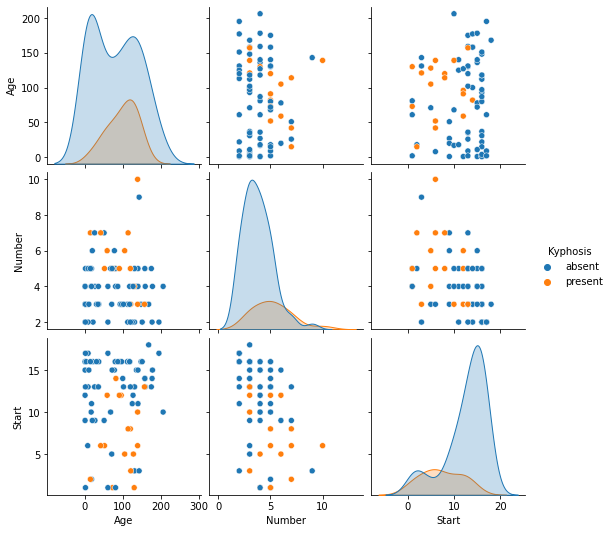

In [7]:
sns.pairplot(df, hue='Kyphosis')

## 2) Train-test-split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis',axis=1)
y= df['Kyphosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## 3) Using Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
Decision = DecisionTreeClassifier()

In [21]:
Decision.fit(X_train, y_train)

DecisionTreeClassifier()

## 4) Predict and Evaluate the model(Based On Decision Tree)

In [22]:
d_pred = Decision.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



In [25]:
print(confusion_matrix(y_test, d_pred))

[[16  3]
 [ 4  2]]


## 5) Compare results with Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier #Coz. Random Forests = Collection of Decision Trees

In [27]:
rfc = RandomForestClassifier(n_estimators = 200)

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
r_pred = rfc.predict(X_test)

In [30]:
print(classification_report(y_test, r_pred))
print('\n')
print(confusion_matrix(y_test, r_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



[[19  0]
 [ 5  1]]


### Conclusion: Model Accuracy of Random Forest Classifier is more than Decision Trees

In [31]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

#### Note: Model is uneven as a large diff. is there between the 2 instances | This affects the model adversely

## 6) Tree Vizualization (Syntax)

* SYNTAX(For Single Decision Tree Viz.): 
     * from Ipython.display import Image
     * from sklearn.externals.six import StringIO
     * from sklearn.tree import export_graphviz
     * import pydot

In [41]:
import six
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

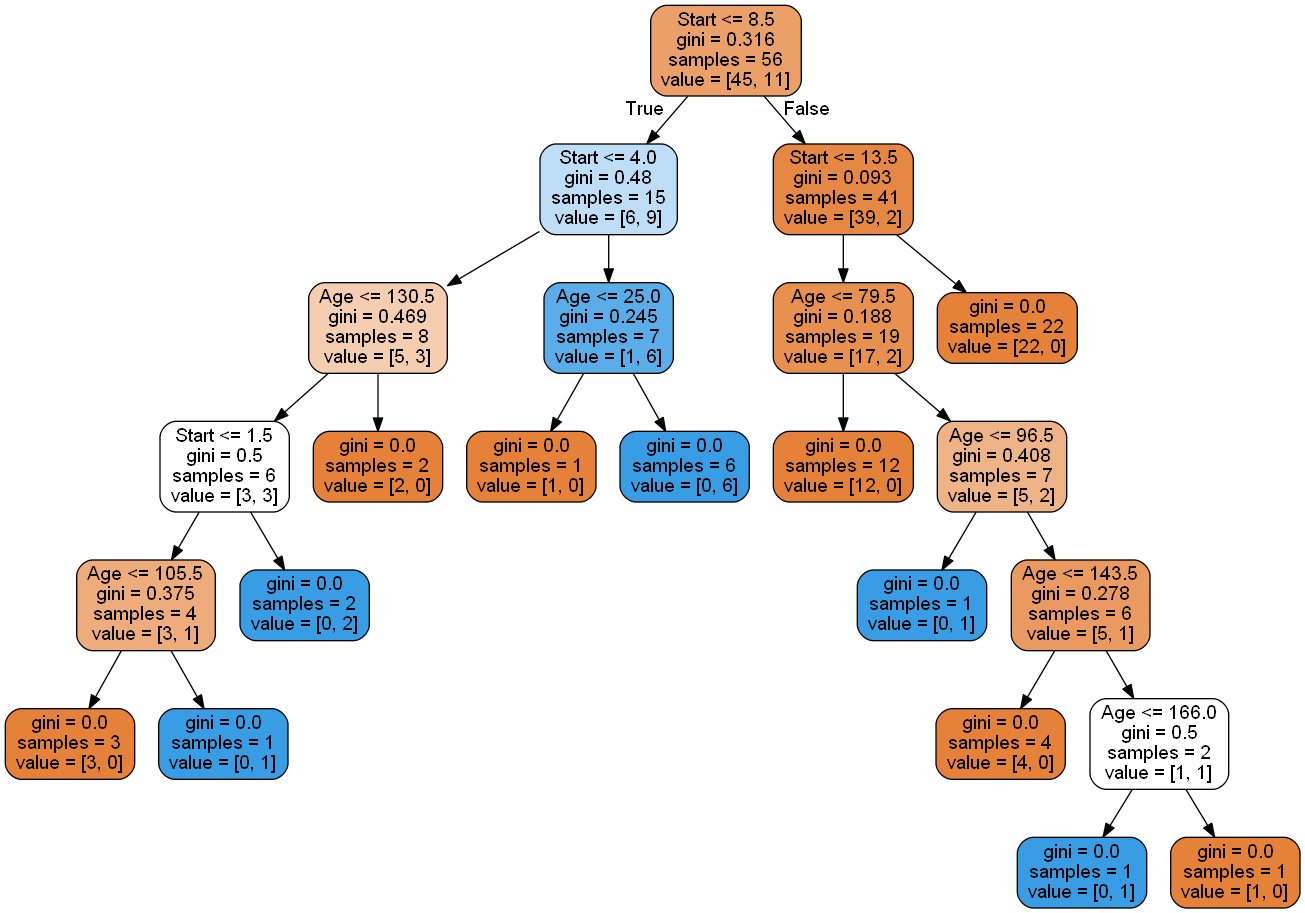

In [43]:
dot_data = StringIO()
export_graphviz(Decision, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())  
